In [1]:
import os
import sys

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  print('Running on Colab... Preparing to mount Google Drive')
  from google.colab import drive
  drive.mount('/content/drive')

  !apt-get install git
  !pip install pupil-apriltags
  !git clone https://github.com/ahmtox/stereo-matching.git

  sys.path.append('/content/stereo-matching')

  print('Google Drive mounted at /content/drive')
else:
  print('Not running on Google Colab.')


Not running on Google Colab.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from camera_calibration import CameraCalibration
from stereogram_generator import StereogramGenerator
from stereo_calibration import stereo_calibrate

In [3]:
if IN_COLAB:
  imgL_path = 'drive/MyDrive/ES143Final/camera_left/IMG_4014.jpeg'
  imgR_path = 'drive/MyDrive/ES143Final/camera_right/IMG_7002.jpeg'
  calib_left_camera_filepath = 'drive/MyDrive/ES143Final/camera_left/Calibration/IMG_*.jpeg'
  calib_right_camera_filepath = 'drive/MyDrive/ES143Final/camera_right/Calibration/IMG_*.jpeg'

else:
  imgL_path = 'camera_left/IMG_4014.jpeg'
  imgR_path = 'camera_right/IMG_7002.jpeg'
  calib_left_camera_filepath = 'camera_left/calibration/IMG_*.jpeg'
  calib_right_camera_filepath = 'camera_right/calibration/IMG_*.jpeg'

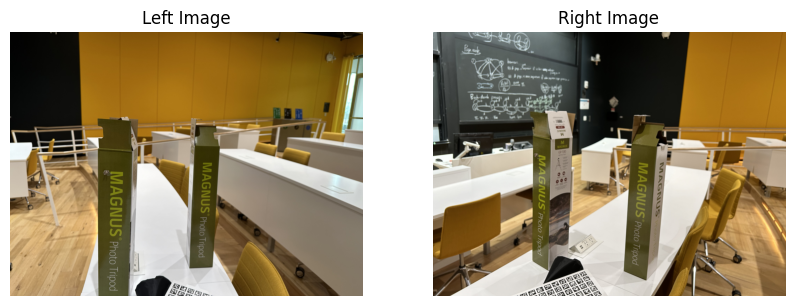

In [4]:
imgL = cv2.imread(imgL_path)
imgR = cv2.imread(imgR_path)

imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(imgL)
ax[0].set_title('Left Image')
ax[0].axis('off')


ax[1].imshow(imgR)
ax[1].set_title('Right Image')
ax[1].axis('off')

plt.show()

Camera Calibration

17 images:
RMSE of reprojected points: 0.6194835538236152
Distortion coefficients: [[ 0.19612 -0.68969 -0.00163 -0.00052  0.68365]]
Intrinsic camera matrix:
 [[2811.51    0.   1993.74]
 [   0.   2809.57 1504.82]
 [   0.      0.      1.  ]]
Total images used for calibration:  16
Extrinsic matrix for image 1:
[[-0.21  0.97 -0.09  3.34]
 [ 0.98  0.22  0.04 -8.4 ]
 [ 0.06 -0.08 -1.   19.67]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 2:
[[ 0.08  0.99 -0.09  0.16]
 [ 0.78 -0.    0.63 -4.96]
 [ 0.62 -0.12 -0.77 17.21]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 3:
[[-0.02  0.91  0.41  1.19]
 [ 0.98 -0.05  0.17 -4.97]
 [ 0.18  0.4  -0.9  16.37]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 4:
[[ 0.04  0.99  0.14  0.4 ]
 [ 0.92  0.02 -0.4  -6.24]
 [-0.4   0.14 -0.91 21.04]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 5:
[[ 0.03  0.98 -0.21  0.65]
 [ 0.79  0.11  0.6  -5.04]
 [ 0.61 -0.19 -0.77 16.47]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image

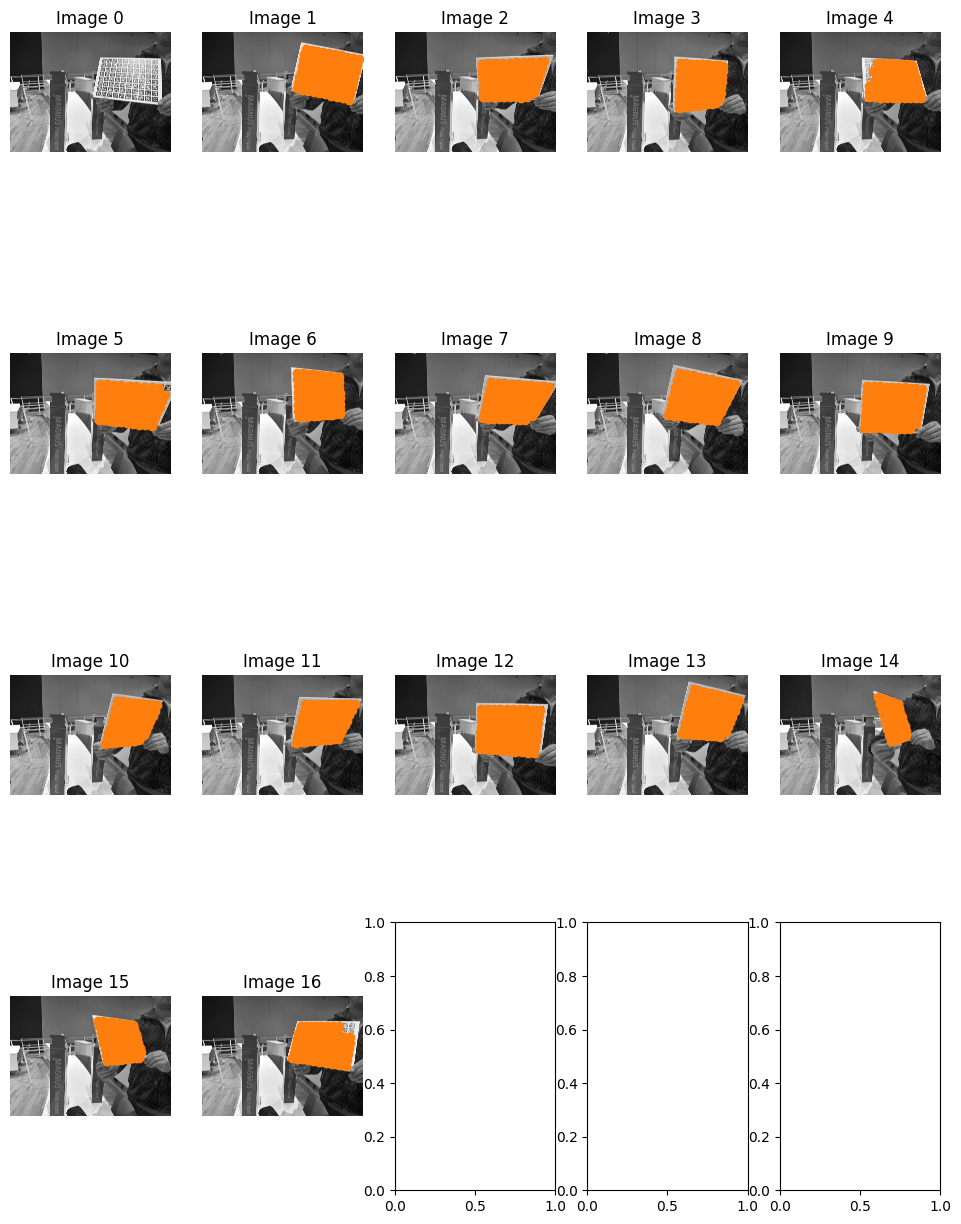

In [5]:
left_cc = CameraCalibration()
reprojerr_L, calMatrix_L, distCoeffs_L, calRotations_L, calTranslations_L, extrinsic_matrices_L, calObjPoints_L, calImgPoints_L = left_cc.calibrate_camera(calib_left_camera_filepath, True)

17 images:
RMSE of reprojected points: 0.6194835538236152
Distortion coefficients: [[ 0.19612 -0.68969 -0.00163 -0.00052  0.68365]]
Intrinsic camera matrix:
 [[2811.51    0.   1993.74]
 [   0.   2809.57 1504.82]
 [   0.      0.      1.  ]]
Total images used for calibration:  16
Extrinsic matrix for image 1:
[[-0.21  0.97 -0.09  3.34]
 [ 0.98  0.22  0.04 -8.4 ]
 [ 0.06 -0.08 -1.   19.67]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 2:
[[ 0.08  0.99 -0.09  0.16]
 [ 0.78 -0.    0.63 -4.96]
 [ 0.62 -0.12 -0.77 17.21]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 3:
[[-0.02  0.91  0.41  1.19]
 [ 0.98 -0.05  0.17 -4.97]
 [ 0.18  0.4  -0.9  16.37]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 4:
[[ 0.04  0.99  0.14  0.4 ]
 [ 0.92  0.02 -0.4  -6.24]
 [-0.4   0.14 -0.91 21.04]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image 5:
[[ 0.03  0.98 -0.21  0.65]
 [ 0.79  0.11  0.6  -5.04]
 [ 0.61 -0.19 -0.77 16.47]
 [ 0.    0.    0.    1.  ]]
Extrinsic matrix for image

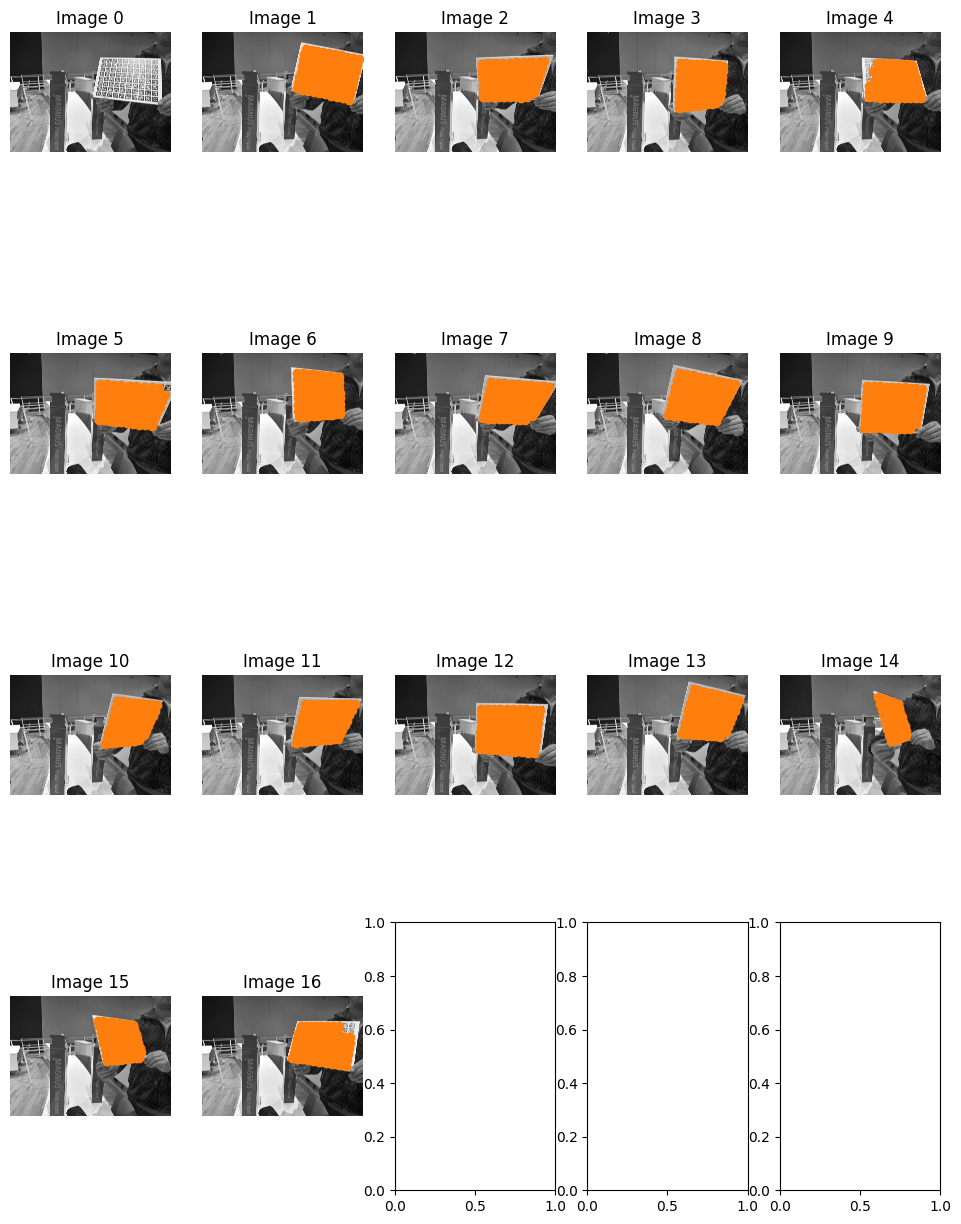

In [6]:
right_cc = CameraCalibration()
reprojerr_R, calMatrix_R, distCoeffs_R, calRotations_R, calTranslations_R, extrinsic_matrices_R, calObjPoints_R, calImgPoints_R = right_cc.calibrate_camera(calib_left_camera_filepath, True)

In [7]:
img_shape = (imgR.shape[0], imgR.shape[1])
R, T, E, F = stereo_calibrate(calObjPoints_L, calImgPoints_L, calImgPoints_R, calMatrix_L, distCoeffs_L, calMatrix_R, distCoeffs_R, img_shape)

Rotation Matrix (R):
 [[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]
Translation Vector (T):
 [[ 0.]
 [-0.]
 [-0.]]
Essential Matrix (E):
 [[-0.  0. -0.]
 [-0.  0. -0.]
 [ 0.  0. -0.]]
Fundamental Matrix (F):
 [[ 2.09e-08 -3.47e+04  1.11e+08]
 [ 3.47e+04 -8.40e-08 -2.74e+06]
 [-1.11e+08  2.74e+06  1.00e+00]]


In [8]:
R1, R2, P1, P2, Q, roi_left, roi_right = cv2.stereoRectify(calMatrix_L, distCoeffs_L, calMatrix_R, distCoeffs_R, imgL.shape[:2], R, T)

map1x, map1y = cv2.initUndistortRectifyMap(calMatrix_L, distCoeffs_L, R1, P1, imgL.shape[:2], cv2.CV_32FC1)
map2x, map2y = cv2.initUndistortRectifyMap(calMatrix_R, distCoeffs_R, R2, P2, imgR.shape[:2], cv2.CV_32FC1)

rectified_imgL = cv2.remap(imgL, map1x, map1y, cv2.INTER_LINEAR)
rectified_imgR = cv2.remap(imgR, map2x, map2y, cv2.INTER_LINEAR)


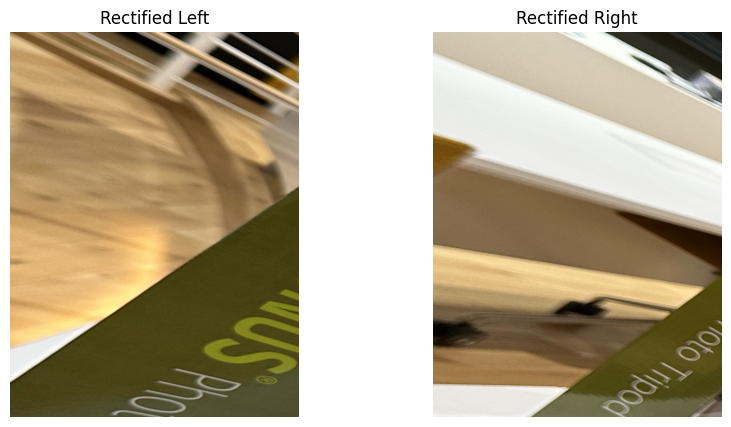

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(rectified_imgL)
ax[0].set_title('Rectified Left')
ax[0].axis('off')

ax[1].imshow(rectified_imgR)
ax[1].set_title('Rectified Right')
ax[1].axis('off')

plt.show()

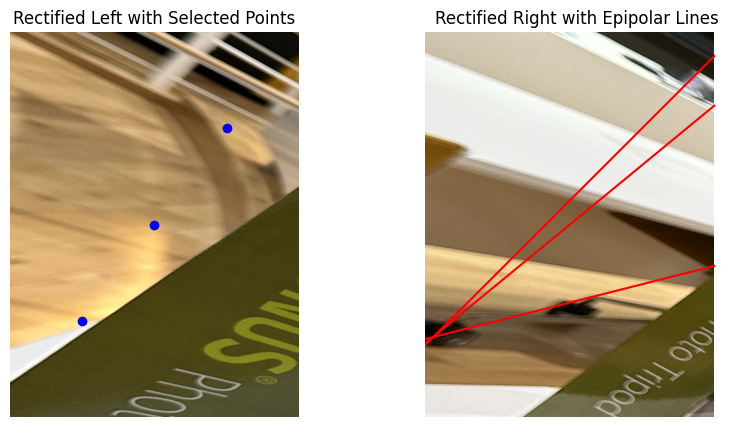

In [10]:
def plot_epipolar_lines(image, epilines, ax, color='r'):
    height, width = image.shape[:2]
    

    for r in epilines:
        x0, y0 = 0, int(-r[2] / r[1]) 
        x1, y1 = width, int(-(r[2] + r[0] * width) / r[1]) 
        
        ax.plot([x0, x1], [y0, y1], color)


points_left = np.array([
    [1512, 2016],  
    [756, 3024],  
    [2268, 1008],  
], dtype=np.float32)

points_homogeneous = np.hstack([points_left, np.ones((points_left.shape[0], 1))])

epilines_right = cv2.computeCorrespondEpilines(points_homogeneous, 1, F).reshape(-1, 3)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(rectified_imgL)
ax[0].scatter(points_left[:, 0], points_left[:, 1], c='b', marker='o')  
ax[0].set_title('Rectified Left with Selected Points')
ax[0].axis('off')

ax[1].imshow(rectified_imgR)
plot_epipolar_lines(rectified_imgR, epilines_right, ax[1])
ax[1].set_title('Rectified Right with Epipolar Lines')
ax[1].axis('off')



plt.show()

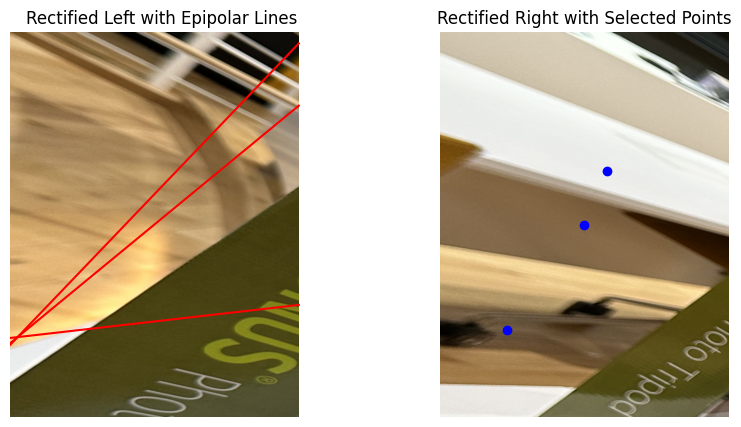

In [11]:
points_right = np.array([
    [1512, 2016],  
    [700, 3124],  
    [1750, 1450],   
], dtype=np.float32)

points_homogeneous = np.hstack([points_right, np.ones((points_right.shape[0], 1))])

epilines_left = cv2.computeCorrespondEpilines(points_homogeneous, 2, F).reshape(-1, 3)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(rectified_imgL)
plot_epipolar_lines(rectified_imgL, epilines_left, ax[0])
ax[0].set_title('Rectified Left with Epipolar Lines')
ax[0].axis('off')

ax[1].imshow(rectified_imgR)
ax[1].scatter(points_right[:, 0], points_right[:, 1], c='b', marker='o')  
ax[1].set_title('Rectified Right with Selected Points')
ax[1].axis('off')

plt.show()